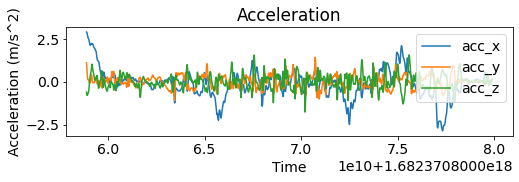

Epoch 1/100
14/14 [==============================] - 2s 51ms/step - loss: 0.9823 - accuracy: 0.2286 - mse: 0.9823 - val_loss: 0.9150 - val_accuracy: 0.2789 - val_mse: 0.9150
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.8671 - accuracy: 0.3390 - mse: 0.8671 - val_loss: 0.8094 - val_accuracy: 0.3474 - val_mse: 0.8094
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.7684 - accuracy: 0.4254 - mse: 0.7684 - val_loss: 0.7280 - val_accuracy: 0.4579 - val_mse: 0.7280
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5223 - mse: 0.6926 - val_loss: 0.6690 - val_accuracy: 0.5263 - val_mse: 0.6690
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6443 - accuracy: 0.5899 - mse: 0.6443 - val_loss: 0.6351 - val_accuracy: 0.5947 - val_mse: 0.6351
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6093 - accuracy: 0.6475 - mse: 0.6093 - val_loss: 0.5974 - 

14/14 [==============================] - 0s 7ms/step - loss: 0.5172 - accuracy: 0.9377 - mse: 0.5172 - val_loss: 0.5249 - val_accuracy: 0.9000 - val_mse: 0.5249
Epoch 49/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5171 - accuracy: 0.9407 - mse: 0.5171 - val_loss: 0.5249 - val_accuracy: 0.9105 - val_mse: 0.5249
Epoch 50/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5171 - accuracy: 0.9407 - mse: 0.5171 - val_loss: 0.5248 - val_accuracy: 0.9158 - val_mse: 0.5248
Epoch 51/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.9371 - mse: 0.5170 - val_loss: 0.5247 - val_accuracy: 0.9158 - val_mse: 0.5247
Epoch 52/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5169 - accuracy: 0.9436 - mse: 0.5169 - val_loss: 0.5248 - val_accuracy: 0.9105 - val_mse: 0.5248
Epoch 53/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5169 - accuracy: 0.9377 - mse: 0.5169 - val_loss: 0.5247 - val_accu

14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9589 - mse: 0.5157 - val_loss: 0.5235 - val_accuracy: 0.9263 - val_mse: 0.5235
Epoch 96/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9612 - mse: 0.5157 - val_loss: 0.5234 - val_accuracy: 0.9316 - val_mse: 0.5234
Epoch 97/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9618 - mse: 0.5157 - val_loss: 0.5235 - val_accuracy: 0.9263 - val_mse: 0.5235
Epoch 98/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9636 - mse: 0.5157 - val_loss: 0.5234 - val_accuracy: 0.9368 - val_mse: 0.5234
Epoch 99/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9606 - mse: 0.5157 - val_loss: 0.5236 - val_accuracy: 0.9263 - val_mse: 0.5236
Epoch 100/100
6/6 [==============================] - 0s 3ms/step


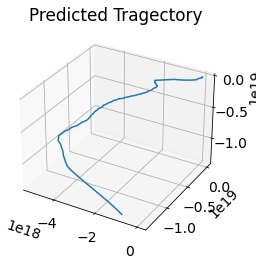

In [1]:
from tqdm import tqdm
from pathlib import Path
import json
import plotly.graph_objs as go
from PIL import Image
from datetime import datetime

from tensorflow import keras
from tensorflow.keras import layers


from ahrs.filters import EKF
from ahrs.common.orientation import acc2q
from ahrs.utils import WMM
from scipy.spatial.transform import Rotation as R
from scipy import integrate
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tensorflow as tf
from sklearn.model_selection import train_test_split


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from dataclasses import dataclass

import matplotlib.pyplot as plt # visualization
plt.rcParams.update({'font.size': 14})
import seaborn as sns # visualization

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.spatial.transform import Rotation as R
from sklearn.preprocessing import StandardScaler

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.pack()
        self.create_widgets()
        self.configure(bg="white")
        
        
        
    def create_widgets(self):
        # Bouton pour charger les données
        self.load_button = tk.Button(self, text="Load data", command=self.load_data, width=15)
        self.load_button.grid(row=0, column=0, padx=10, pady=10)
        # Bouton pour effectuer le traitement des données
        self.process_button = tk.Button(self, text="Process data", command=self.process_data, width=15)
        self.process_button.grid(row=1, column=0, padx=10, pady=10)

        # Bouton pour afficher les commentaires
        self.comment_button = tk.Button(self, text="Show comments", command=self.show_comments, width=15)
        self.comment_button.grid(row=0, column=1, padx=10, pady=10)

        # Bouton pour afficher la visualisation en 3D
        self.plot_button = tk.Button(self, text="Plot data", command=self.plot_data, width=15)
        self.plot_button.grid(row=1, column=1, padx=10, pady=10)

        # Zone de texte pour les commentaires
        self.comment_text = tk.Text(self, height=5)
        self.comment_text.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

        # Canevas pour la figure
        self.canvas = tk.Canvas(self, width=600, height=600)
        self.canvas.grid(row=4, column=0, columnspan=2, padx=10, pady=10)


        
        
    def load_data(self):
        # Ouvrir la boîte de dialogue pour charger les données
        file_path = filedialog.askopenfilename()

        # Charger les données dans un DataFrame pandas
        self.data = pd.read_csv(file_path)

        # Activer le bouton pour effectuer le traitement des données
        self.process_button["state"] = "normal"

    def show_comments(self):
        
                # Load and preprocess data
        train_data, test_data = train_test_split(self.data, test_size=0.1, random_state=42)

       
        train_data = (train_data - train_data.mean()) / train_data.std() # Standardize data
        test_data = (test_data - test_data.mean()) / test_data.std() # Standardize data
        train_data = np.array(train_data) # Convert to numpy array
        test_data = np.array(test_data) # Convert to numpy array

        # Define and train autoencoder
        input_dim = train_data.shape[1]
        encoding_dim = 32
        autoencoder = tf.keras.Sequential([
            layers.Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(input_dim, activation='relu')
        ])
        autoencoder.compile(optimizer='adam',metrics=['accuracy','mse'], loss='mse')
        autoencoder.fit(train_data, train_data, epochs=100,verbose=1, batch_size=128, shuffle=True, validation_data=(test_data, test_data))
        
        # Detect anomalies using autoencoder reconstruction error
        preds = autoencoder.predict(test_data)
        mse = np.mean(np.power(test_data - preds, 2), axis=1)
        threshold = np.max(mse) # Set threshold to max reconstruction error
        anomalies = test_data[mse > threshold]

        # Print number of anomalies and indices of anomalous data
        self.comment_text.insert("end",f' Number of anomalies: {len(anomalies)}')
        self.comment_text.insert("end",f' Anomaly indices: {np.where(mse > threshold)}')
        
        

        
        
    def plot_data(self):
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
        time=self.data.iloc[:,0]

        axs.plot(time, self.data.iloc[:,1], label='acc_x')
        axs.plot(time, self.data.iloc[:,2], label='acc_y')
        axs.plot(time, self.data.iloc[:,3], label='acc_z')
        axs.set_title('Acceleration')
        axs.set_xlabel('Time')
        axs.set_ylabel('Acceleration (m/s^2)')
        axs.legend()

   

        plt.show()

        # Créer le canevas pour afficher la figure
        canvas = FigureCanvasTkAgg(fig, master=self.canvas)
        canvas.draw()

        # Afficher le canevas dans l'interface graphique
        canvas.get_tk_widget().pack()

    def process_data(self):
        # Effectuer le traitement des données
        ekf_estimator = EKF(gyr=self.data.iloc[:,1:4].values, acc=self.data.iloc[:,4:7].values, mag=self.data.iloc[:,7:10].values, frequency=100.0)
        Q = ekf_estimator.Q
        n_samples = self.data.shape[0]
        new_acce = np.zeros((n_samples, 3))
        data_acc = self.data.iloc[:,4:7].values
        for t in range(n_samples):
            r = R.from_quat(Q[t])
            new_acce[t] = np.matmul(r.as_matrix().T, data_acc[t])
        vel_0x = integrate.cumtrapz(new_acce[:,0], self.data.iloc[:,0].values, initial=0)
        vel_0y = integrate.cumtrapz(new_acce[:,1], self.data.iloc[:,0].values, initial=0)
        vel_0z = integrate.cumtrapz(new_acce[:,1], self.data.iloc[:,0].values, initial=0)
        
        posx = integrate.cumtrapz(vel_0x, self.data.iloc[:,0].values, initial=0)
        posy = integrate.cumtrapz(vel_0y, self.data.iloc[:,0].values, initial=0)
        posz = integrate.cumtrapz(vel_0z, self.data.iloc[:,0].values, initial=0)


        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.figsize=(16,16)
        ax.set_title('Predicted Tragectory')

        # Tracer les données en 3D
        ax.plot(posx, posy, posz)
        # Créer le canevas pour afficher la figure
        canvas = FigureCanvasTkAgg(fig, master=self.canvas)
        self.canvas = tk.Canvas(self, width=30, height=30)

        canvas.draw()

        # Afficher le canevas dans l'interface graphique
        canvas.get_tk_widget().pack()

        # Afficher la figure
        plt.show()





root = tk.Tk()

# Création de la fenêtre principale
root.title("Page d'accueil")





app = Application(master=root)
app.mainloop()


